In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import math
import os
import os.path as osp
from tqdm.auto import tqdm
from analysis.plot_matplotlib import plot_hist
#module_reload('analysis')
from analysis.mem_ana import load_results, parse_line_to_float
from analysis.utils import module_reload

/nfs/dust/ilc/user/bliewert/.mambaforge/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
src_path = "/nfs/dust/ilc/user/bliewert/mem_integrate/results"
event_idx = 7336
file_path = f"{src_path}/event_{str(event_idx)}/result.txt"

In [3]:
keys = ['zhh', 'zzh']
result = {
    
}
for key in keys:
    result[f'res_{key}'] = []
    result[f'sigma_{key}'] = []

with open(file_path, 'r') as file:
    Lines = file.readlines()
    
    for line in tqdm(Lines):
        for key in keys:
            if line.startswith(key.upper()):
                res, uncert = parse_line_to_float(line, with_uncert=True)
                
                result[f'res_{key}'].append(res)
                result[f'sigma_{key}'].append(uncert)
        
df = pd.DataFrame(result)

100%|██████████| 767/767 [00:00<00:00, 259249.83it/s]


In [4]:
np.average(df['res_zhh']), np.average(df['res_zzh'])

(2.1327890625e-07, 6.65655859375e-09)

In [5]:
np.average(df['sigma_zhh']), np.average(df['sigma_zzh'])

(2.0640625000000002e-08, 4.5980468749999995e-10)

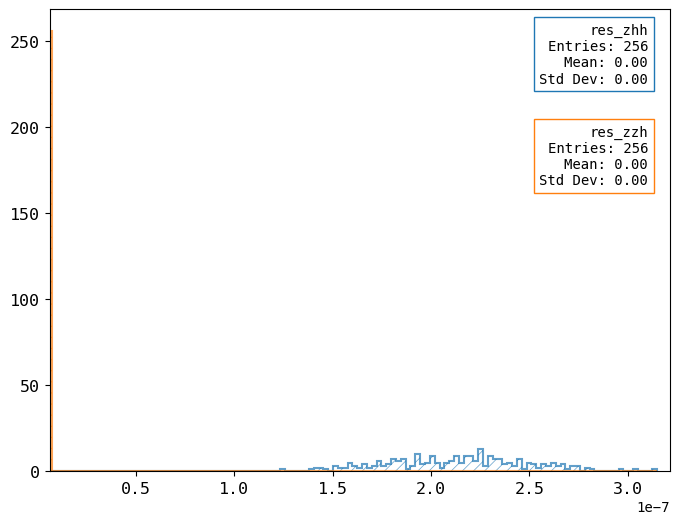

In [6]:
plot_hist(df, x=['res_zhh', 'res_zzh']);

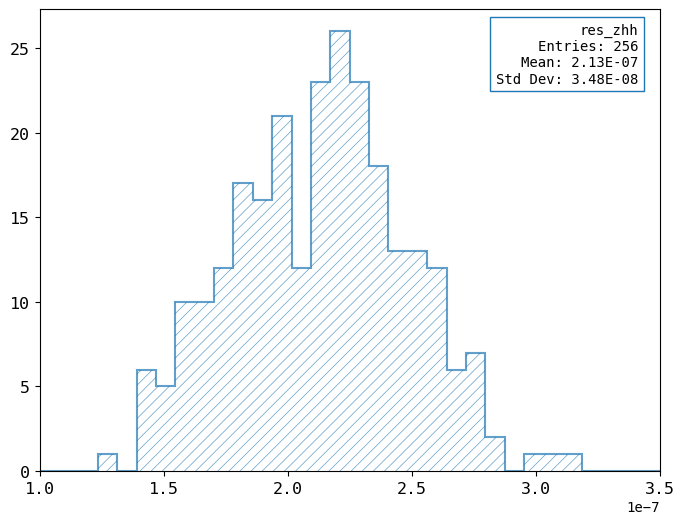

In [7]:
xlim = (1e-7, 3.5e-7)
plot_hist(df, x=['res_zhh'], xlim=xlim, xlim_binning=xlim, scientific_stats=True, bins=32);

In [8]:
from analysis.mc.tools import variance_weighted_result

In [39]:
from math import floor, log10

def fexp(f):
    return int(floor(log10(abs(f)))) if f != 0 else 0

def fman(f):
    return f/10**fexp(f)

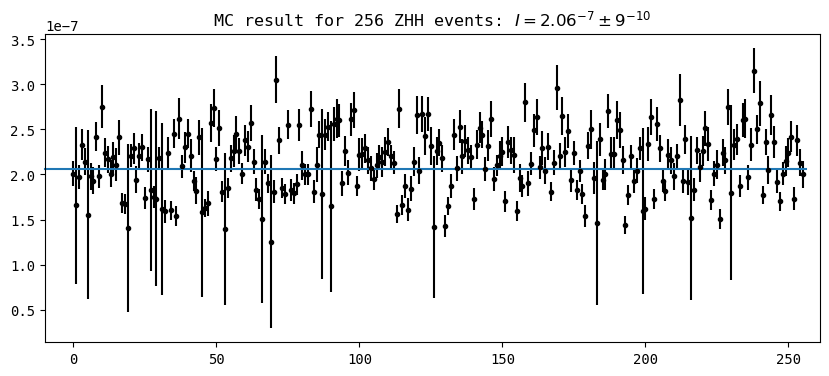

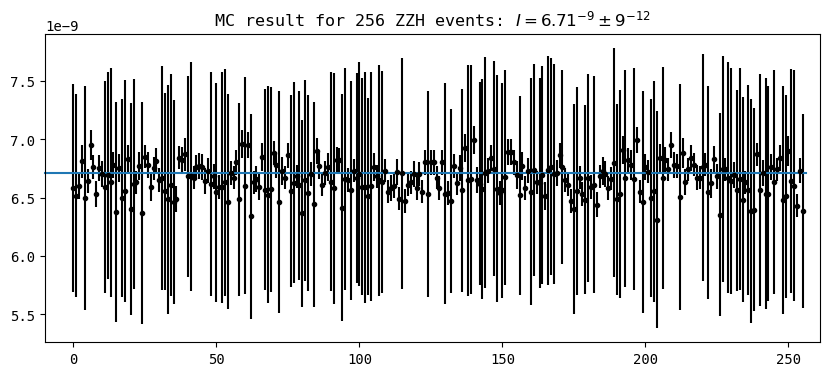

In [78]:
from matplotlib.patches import Rectangle

for key in ['zhh', 'zzh']:
    sample_ratio = 1
    sample_mask = np.arange(int(sample_ratio*len(df)))
    
    mean_tot, sigma_tot = variance_weighted_result(df[f'res_{key}'][sample_mask].to_numpy(), df[f'sigma_{key}'][sample_mask].to_numpy())

    xmax = len(sample_mask)

    fig, ax = plt.subplots(figsize=(10,4))
    ax.errorbar(np.arange(xmax), df[f'res_{key}'][sample_mask], yerr=df[f'sigma_{key}'][sample_mask], fmt='.k');
    
    start_left = -10#ax.get_xlim()[0]
    p1 = ax.plot([start_left, xmax], [mean_tot]*2)
    ax.set_xlim(-10, xmax+5)
    #ax.fill_between([0, xmax], [mean_tot-sigma_tot, mean_tot], [mean_tot, mean_tot+sigma_tot])
    p2 = ax.add_patch(Rectangle((start_left, mean_tot-sigma_tot), xmax-start_left, 2*sigma_tot, facecolor="blue", alpha=0.4))
    
    p1[0].set_clip_on(False)
    p2.set_clip_on(False)
    
    mean_str = f'{fman(mean_tot):.2f}^' + "{" + f'{fexp(mean_tot)}' + "}"
    sigma_str = f'{fman(sigma_tot):.0f}^' + "{" + f'{fexp(sigma_tot)}' + "}"

    ax.set_title(rf'MC result for {xmax} {key.upper()} events: $I = {mean_str} \pm {sigma_str} $')
    
    plt.show()

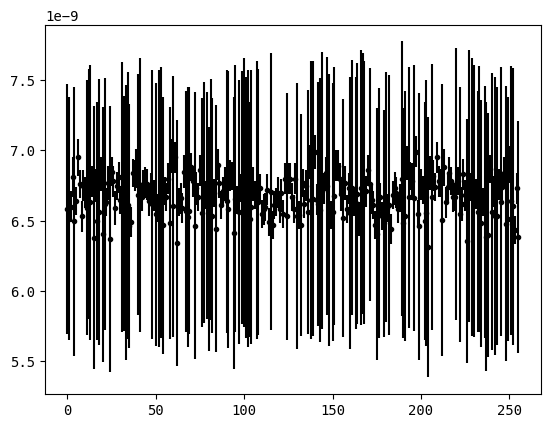

In [71]:
plt.errorbar(np.arange(len(df['sigma_zzh'])), df['res_zzh'], yerr=df['sigma_zzh'], fmt='.k');

In [34]:
df['res_zzh']

0      6.581000e-09
1      6.514000e-09
2      6.600000e-09
3      6.810000e-09
4      6.494000e-09
           ...     
251    6.640000e-09
252    6.602000e-09
253    6.430000e-09
254    6.730000e-09
255    6.383000e-09
Name: res_zzh, Length: 256, dtype: float64

(array([ 6.,  9., 22., 41., 44., 48., 45., 23., 12.,  6.]),
 array([6.310e-09, 6.378e-09, 6.446e-09, 6.514e-09, 6.582e-09, 6.650e-09,
        6.718e-09, 6.786e-09, 6.854e-09, 6.922e-09, 6.990e-09]),
 <BarContainer object of 10 artists>)

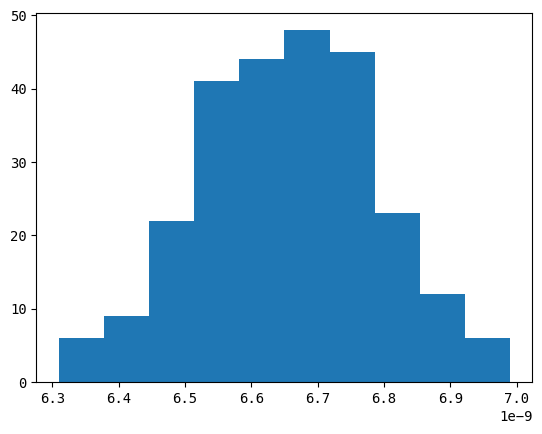

In [36]:
import matplotlib.pyplot as plt
plt.hist(df['res_zzh'])

In [44]:
from analysis.utils import module_reload
module_reload('analysis')
from analysis.plot_matplotlib import plot_hist

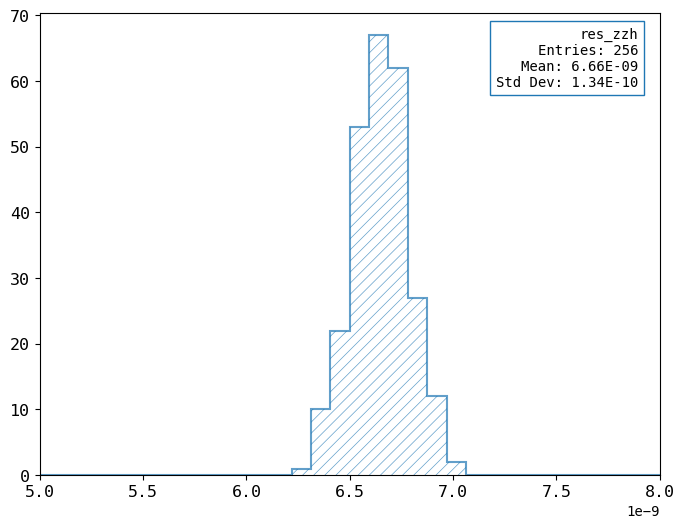

In [63]:
xlim = (5e-9, 8e-9)
plot_hist(df, x=['res_zzh'], xlim=xlim, xlim_binning=xlim, scientific_stats=True, bins=32);

In [ ]:
np.random.seed(2023)

results = load_results("/nfs/dust/ilc/user/bliewert/mem_integrate/results", reco)

print([
    np.count_nonzero(results["zhh_mem"] > results["zzh_mem"]),
    np.count_nonzero(results["zhh_mem"] < results["zzh_mem"])
], "nMEM(Sig > Bkg), nMEM(Sig < Bkg)")
print([
    np.count_nonzero(results["is_zhh"]),
    np.count_nonzero(results["is_zzh"])
], "nSig : nBkg")